In [2]:
from sys import version
import tensorflow
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from keras.callbacks import EarlyStopping
from os import makedirs
from keras.models import model_from_json

from matplotlib import pyplot as plt
plt.style.use('seaborn')
print(version)

Using TensorFlow backend.
3.6.2 |Anaconda custom (64-bit)| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [3]:
# load model
import pickle
with open("../models/final_nn/15m_column_labels.pkl", 'rb') as f:
    column_labels = pickle.load(f)
    
with open("../models/final_nn/model_15min.json") as f:
    model = model_from_json(f.read())
model.load_weights("../models/final_nn/model_15min_weights_train.h5")





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








In [4]:
weight_matrices = model.get_weights()
for m in weight_matrices:
    print(m.shape)
#0 (414, 1020) : each column's contribution to the neuron (pre-sigmoid)

#1 (1020,) : bias for the 1st layer. Not relative importance of each neuron, rather just a "volume adjustment" for each neuron.

#2 (1020, 1)  # each neuron's contribution to the linear output

#3 (1,): bias, kind of like the x intercept of the model.
# 7.2101936

(414, 1020)
(1020,)
(1020, 1)
(1,)


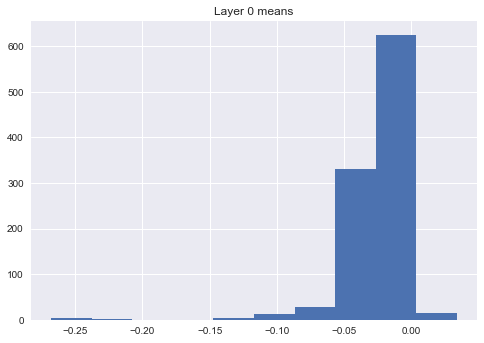

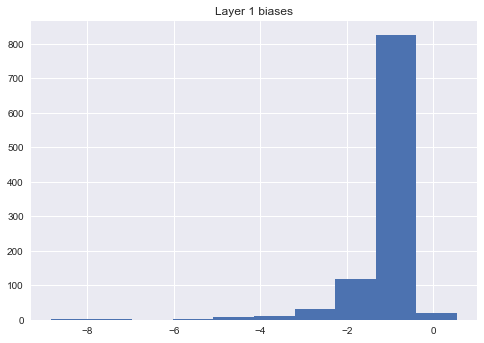

In [5]:
plt.hist(weight_matrices[0].mean(axis=0))
plt.title("Layer 0 means")
plt.show()
plt.hist(weight_matrices[1])
plt.title("Layer 1 biases")
plt.show()

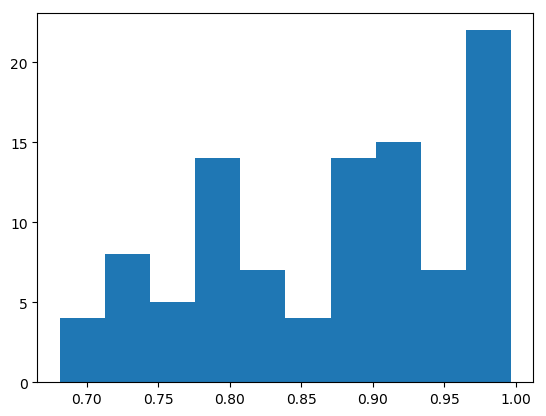

In [25]:
# Add the weights of each neuron to the bias term, ignoring the sigmoid for now
# Logit function is inverse sigmoid
from scipy.special import logit, expit

# Expit = sigmoid!

#print(weight_matrices[2].squeeze().shape)
#print(weight_matrices[1] + weight_matrices[0])

# Take the top 10 positive neurons
top10pos = np.argsort(weight_matrices[2].squeeze())[-60:]
top10neg = np.argsort(weight_matrices[2].squeeze())[:60]

#pos_contributions = (weight_matrices[0][:,top10pos] - weight_matrices[1][top10pos]).T
#neg_contributions = (weight_matrices[0][:,top10neg] - weight_matrices[1][top10neg]).T
contributions = expit(np.concatenate([pos_contributions,neg_contributions]).squeeze())
#contributions = expit(weight_matrices[0] - weight_matrices[1])# * weight_matrices[2].squeeze()  + weight_matrices[3].squeeze()
#contributions = weight_matrices[2].squeeze() * expit(weight_matrices[0] - weight_matrices[1])

# # Then multiply by the contribution to the output neuron
# contributions = (weight_matrices[0] * weight_matrices[1]) * weight_matrices[2].squeeze()
col_contrib = contributions.mean(axis=1)
plt.hist(col_contrib)
plt.show()

In [19]:
# Which columns had the greatest positive and negative effects, in general?
sorted_idxs = np.argsort(col_contrib)
print("Top positive factors:")
for i in sorted_idxs[-20:][::-1]:
    print(f"{col_contrib[i]:.2f}\t{column_labels[i]}")
print('\n')
print("Top negative factors:")
for i in sorted_idxs[:20]:
    print(f"{col_contrib[i]:.2f}\t{column_labels[i]}")

Top positive factors:
14.59	region: Express
14.59	rte: 522
14.59	end: Burien Transit Center
14.59	end: Rainier Beach
14.59	rte: 7
14.59	rte: 240
14.58	rte: 120
14.58	rte: 180
14.58	end: Southeast Auburn
14.58	end: Kent Station
14.58	start: International District/Chinatown station
14.58	rte: 106
14.58	trip_start_hr_15: 14_30
14.58	rte: 124
14.58	rte: 169
14.58	rte: 40
14.58	end: Green River College
14.58	trip_start_hr_15: 14_45
14.58	trip_start_hr_15: 14_15
14.58	Scaled: orca_total


Top negative factors:
14.46	is_weekend: 1.0
14.48	summer: False
14.51	region: East King County
14.51	is_ns: 1.0
14.51	trip_start_hr_15: 00_0
14.51	is_ns: 0.0
14.51	dir: S
14.51	summer: True
14.52	dir: N
14.52	is_weekend: 0.0
14.52	day_of_week: 6
14.52	region: North King County
14.53	trip_start_hr_15: 22_45
14.53	trip_start_hr_15: 23_15
14.53	trip_start_hr_15: 05_0
14.53	trip_start_hr_15: 23_0
14.53	dir: E
14.53	dir: W
14.53	trip_start_hr_15: 22_30
14.53	trip_start_hr_15: 04_45


['is_weekend: 0.0', 'is_weekend: 1.0', 'trip_start_hr_15: 00_0', 'trip_start_hr_15: 00_15', 'trip_start_hr_15: 00_30', 'trip_start_hr_15: 00_45', 'trip_start_hr_15: 01_0', 'trip_start_hr_15: 01_15', 'trip_start_hr_15: 01_30', 'trip_start_hr_15: 01_45', 'trip_start_hr_15: 02_0', 'trip_start_hr_15: 02_15', 'trip_start_hr_15: 02_30', 'trip_start_hr_15: 02_45', 'trip_start_hr_15: 03_0', 'trip_start_hr_15: 03_15', 'trip_start_hr_15: 03_30', 'trip_start_hr_15: 03_45', 'trip_start_hr_15: 04_0', 'trip_start_hr_15: 04_15', 'trip_start_hr_15: 04_30', 'trip_start_hr_15: 04_45', 'trip_start_hr_15: 05_0', 'trip_start_hr_15: 05_15', 'trip_start_hr_15: 05_30', 'trip_start_hr_15: 05_45', 'trip_start_hr_15: 06_0', 'trip_start_hr_15: 06_15', 'trip_start_hr_15: 06_30', 'trip_start_hr_15: 06_45', 'trip_start_hr_15: 07_0', 'trip_start_hr_15: 07_15', 'trip_start_hr_15: 07_30', 'trip_start_hr_15: 07_45', 'trip_start_hr_15: 08_0', 'trip_start_hr_15: 08_15', 'trip_start_hr_15: 08_30', 'trip_start_hr_15: 08_45'

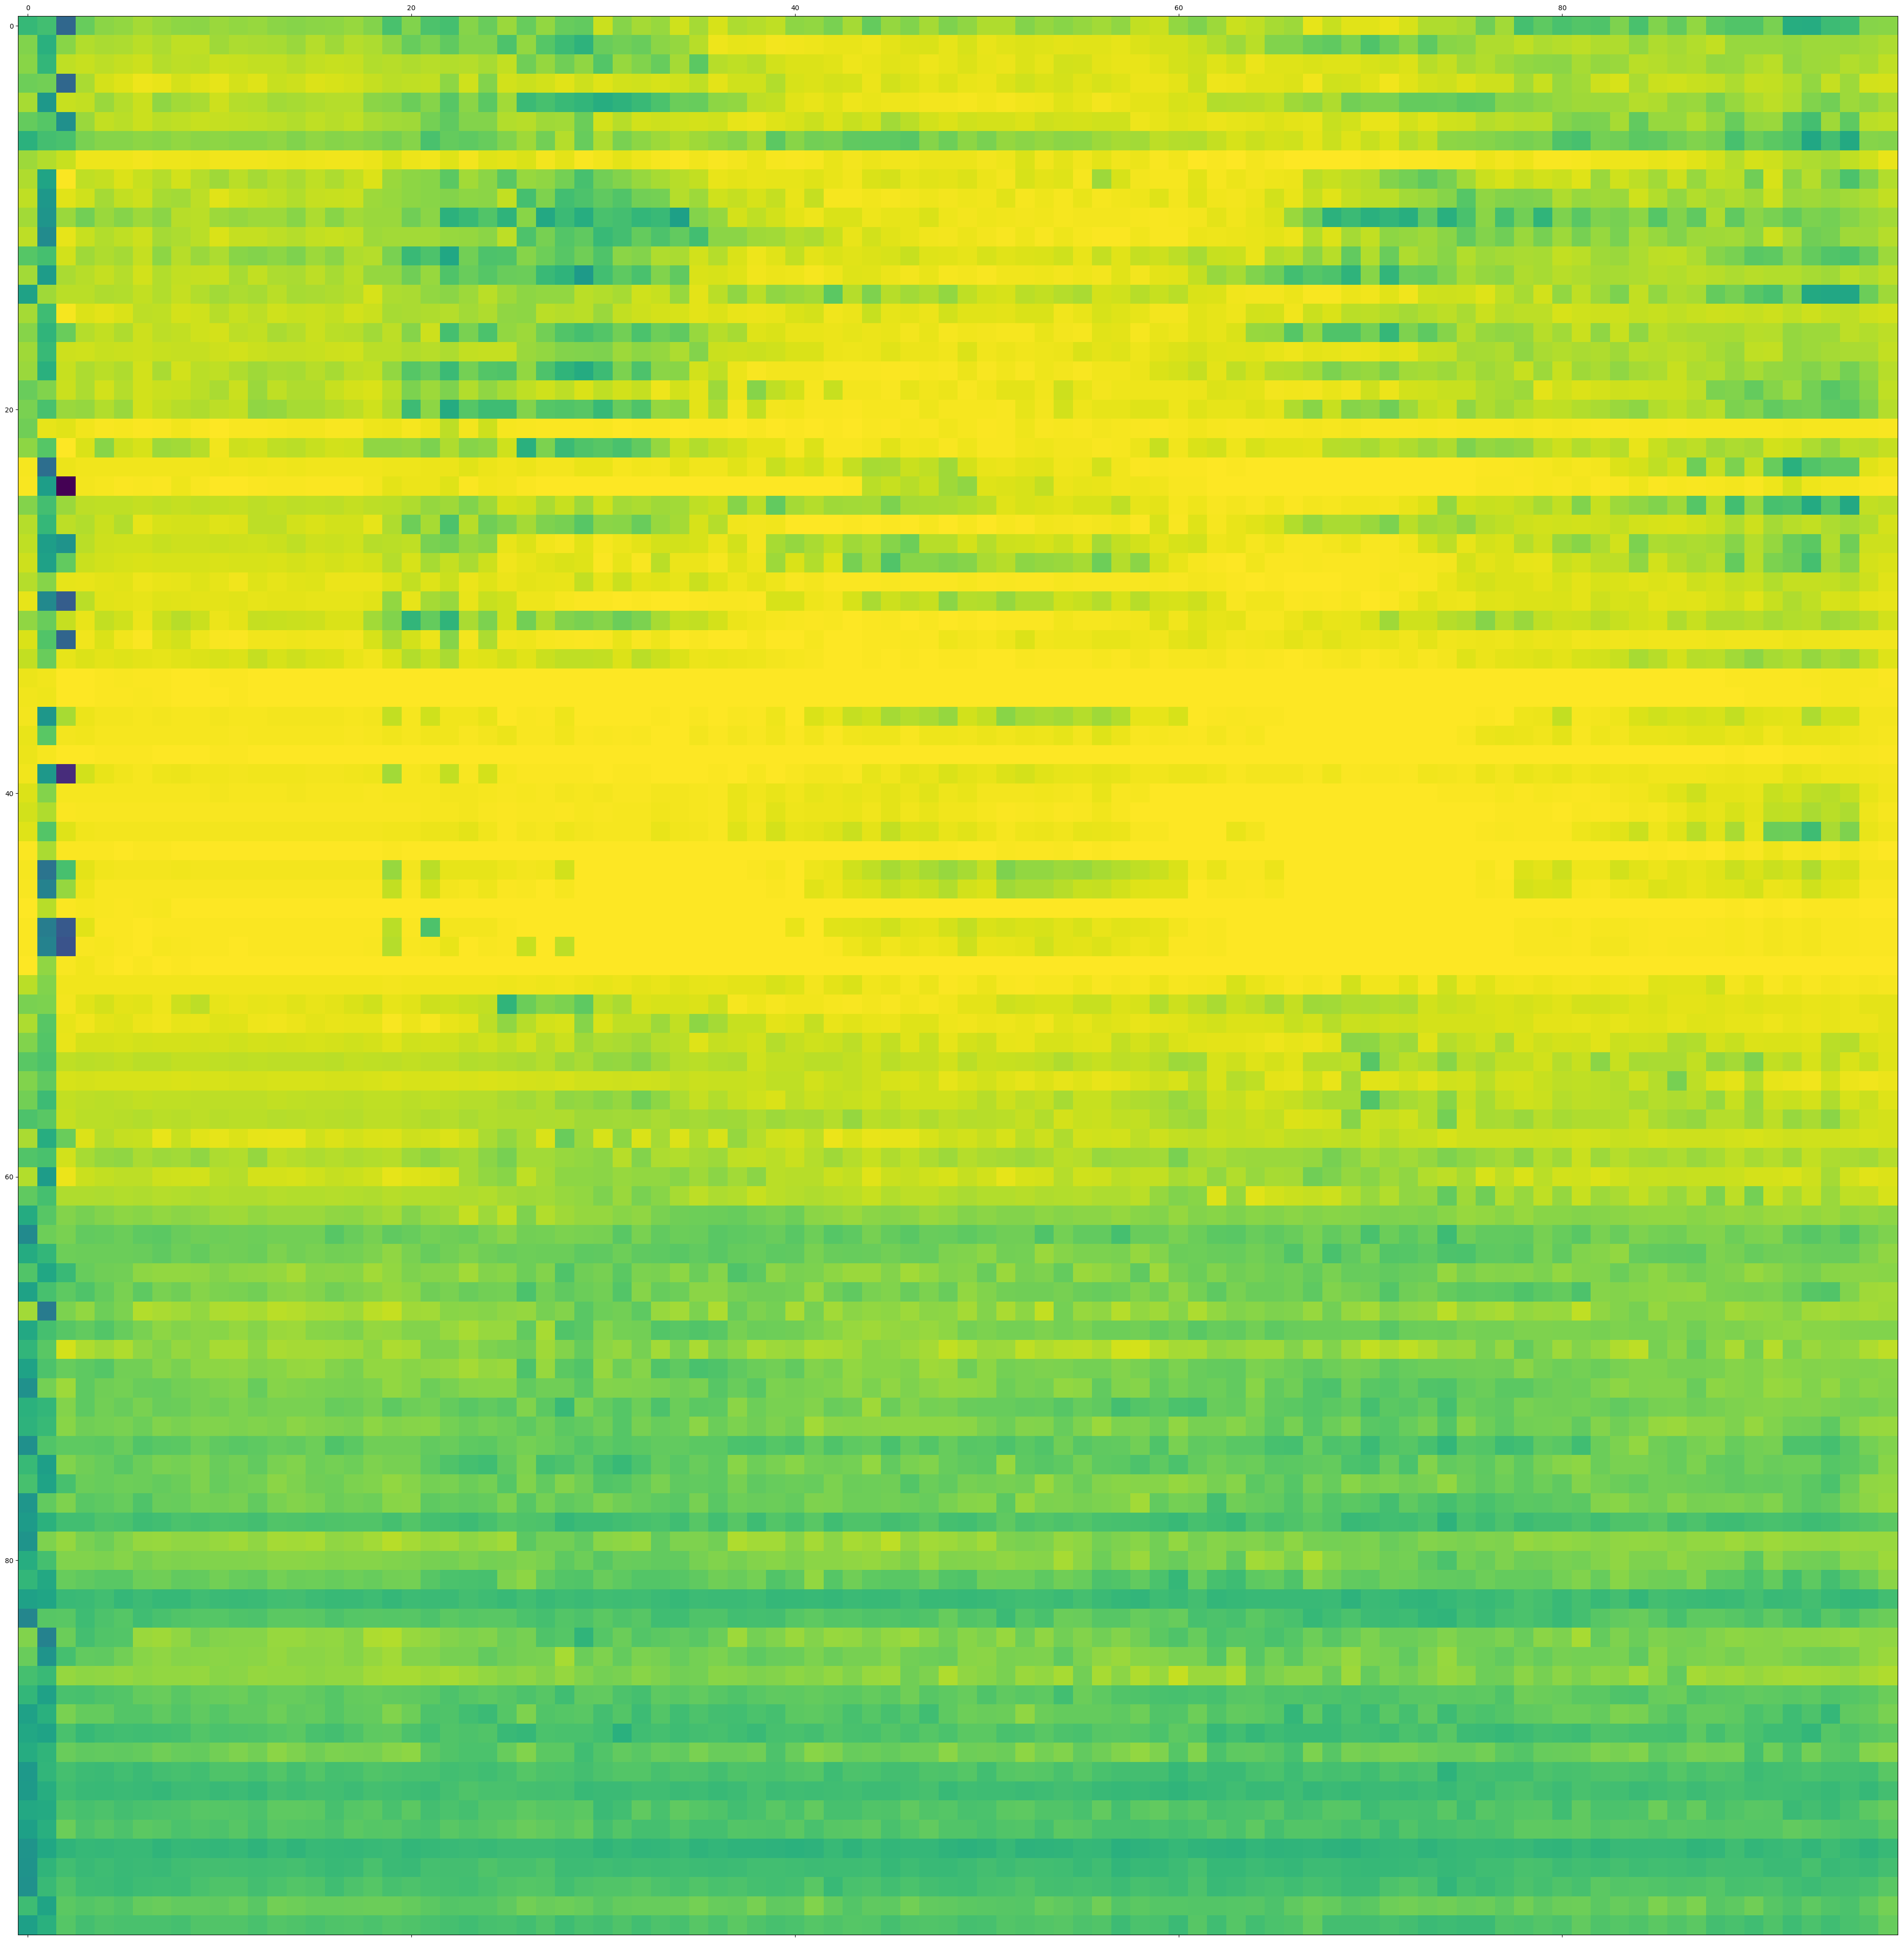

In [26]:
# Were neurons generally focusing on time blocks?
trip_start_columns = list()
trip_start_colnames = list()
for i, lab in enumerate(column_labels):
    if lab.startswith('trip_start') or 'is_weekend' in lab:
        trip_start_columns.append(i)
        trip_start_colnames.append(lab)
trip_start_columns = np.array(trip_start_columns)
print(trip_start_colnames)

plt.style.use('default')
plt.figure(figsize=(50, 60))
plt.matshow(contributions[:,trip_start_columns], fignum=1)
plt.show()

In [87]:
# Sort by neurons with the highest deivation from the overall mean
n2 = np.copy(contributions)
n2 = n2[contributions[:,trip_start_columns].std(axis=0).argsort(),:]

# plt.style.use('default')
# plt.figure(figsize=(20, 20))
# plt.matshow(n2[trip_start_columns,:], fignum=1)
# plt.show()

IndexError: index 20 is out of bounds for axis 0 with size 20

In [7]:
# Some neurons care a lot more about categorical data:

#print(pd.Series(contributions[trip_start_columns,:].sum(axis=0)).describe())
neuron_sums = contributions[trip_start_columns,:].sum(axis=0)
#is_categorical_neuron = (neuron_sums >= 20) | (neuron_sums <= -5)
is_categorical_neuron = (neuron_sums >= 50) | (neuron_sums <= -10)
print(pd.Series(contributions[0,:]).describe())
is_weekend = contributions[1,:] > 10
print(contributions.shape)
print(is_weekend.shape)
print(trip_start_columns.shape)
print(is_categorical_neuron.shape)
plt.style.use('classic')
#plt.figure(figsize=(30, 10))

ticks, labels = list(), ['']
for i in range(0, len(trip_start_colnames), 20):
    ticks.append(i)
    labels.append(trip_start_colnames[i])

fig, ax = plt.subplots(2,1, figsize=(20, 20))
ax[0].set_xticks(range(len(labels)+1))
ax[0].set_xticklabels(labels)
ax[0].matshow(contributions[trip_start_columns,][:,is_categorical_neuron & is_weekend].T)
#ax.tick_params(top=True, bottom=False,labeltop=True, labelbottom=False)
#plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",rotation_mode="anchor")

ax[1].set_xticks(range(len(labels)+1))
ax[1].set_xticklabels(labels)
ax[1].matshow(contributions[trip_start_columns,][:,is_categorical_neuron & (~is_weekend)].T)
plt.show()

NameError: name 'trip_start_columns' is not defined

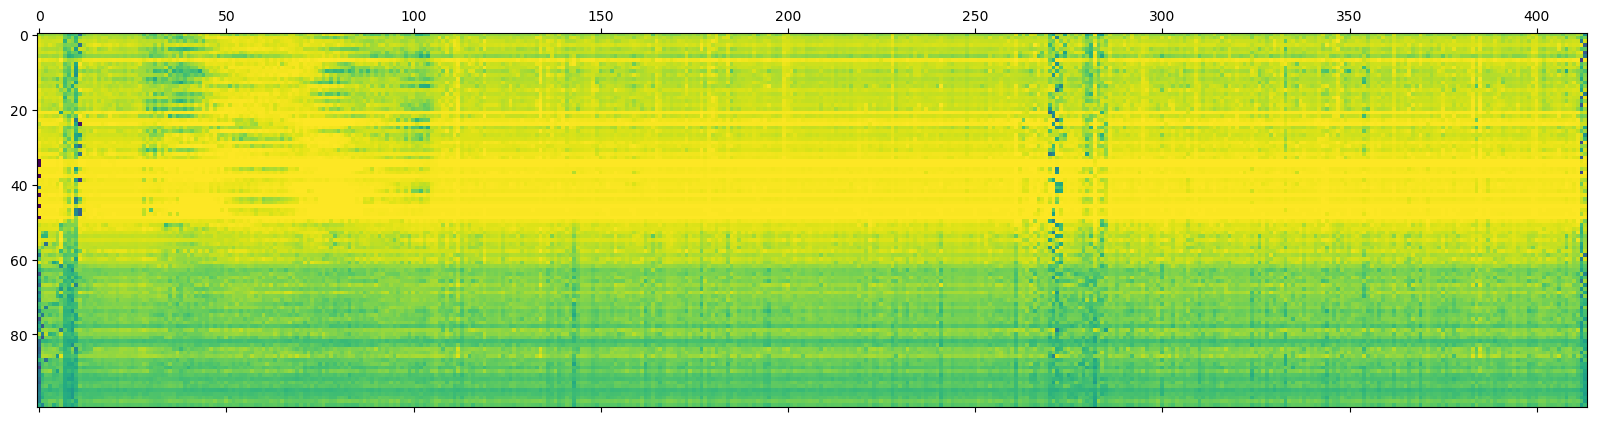

In [29]:

plt.style.use('default')
plt.figure(figsize=(20, 40))
plt.matshow(contributions, fignum=1)
plt.show()

In [140]:
column_labels

['Scaled: orca_total',
 'Scaled: frac_disabled',
 'Scaled: frac_youth',
 'Scaled: frac_senior',
 'Scaled: frac_li',
 'Scaled: frac_uw',
 'Scaled: hour',
 'is_ns: 0.0',
 'is_ns: 1.0',
 'is_weekend: 0.0',
 'is_weekend: 1.0',
 'trip_start_hr_15: 00_0',
 'trip_start_hr_15: 00_15',
 'trip_start_hr_15: 00_30',
 'trip_start_hr_15: 00_45',
 'trip_start_hr_15: 01_0',
 'trip_start_hr_15: 01_15',
 'trip_start_hr_15: 01_30',
 'trip_start_hr_15: 01_45',
 'trip_start_hr_15: 02_0',
 'trip_start_hr_15: 02_15',
 'trip_start_hr_15: 02_30',
 'trip_start_hr_15: 02_45',
 'trip_start_hr_15: 03_0',
 'trip_start_hr_15: 03_15',
 'trip_start_hr_15: 03_30',
 'trip_start_hr_15: 03_45',
 'trip_start_hr_15: 04_0',
 'trip_start_hr_15: 04_15',
 'trip_start_hr_15: 04_30',
 'trip_start_hr_15: 04_45',
 'trip_start_hr_15: 05_0',
 'trip_start_hr_15: 05_15',
 'trip_start_hr_15: 05_30',
 'trip_start_hr_15: 05_45',
 'trip_start_hr_15: 06_0',
 'trip_start_hr_15: 06_15',
 'trip_start_hr_15: 06_30',
 'trip_start_hr_15: 06_45',


In [21]:
# How much did the top N inputs contribute to each neuron?
feature_weights = weight_matrices[0]
top_n = list()
column_names = np.array(column_labels)

for i in weight_matrices[2][:,0].argsort()[:10]:
    weights = feature_weights[:,i]
    print(" weight: " + column_names[weights.argmax()])
    print("Min weight: " + column_names[weights.argmin()])

top_n = np.array(top_n).T.squeeze()
print(top_n.shape)

weight: rte: 125
Min weight: num: orca_total
 weight: num: frac_senior
Min weight: num: orca_total
 weight: num: frac_disabled
Min weight: num: frac_li
 weight: num: frac_senior
Min weight: num: orca_total
 weight: num: frac_disabled
Min weight: is_rapid: 0.0
 weight: end: Kent Station
Min weight: summer: True
 weight: num: orca_total
Min weight: is_rapid: 0.0
 weight: num: frac_li
Min weight: is_rapid: 0.0
 weight: num: orca_total
Min weight: summer: True
 weight: rte: 7
Min weight: is_rapid: 0.0
(0,)


In [80]:
top_n[0].mean(),top_n[1].mean(),top_n[2].mean(),top_n[3].mean(),top_n[4].mean()

(2.8092992, 4.6183567, 6.228235, 7.7144685, 9.109418)

In [47]:
# Find correlations between inputs in neurons
weights = pd.DataFrame(contributions.T, columns = column_labels)
cors = weights.corr()

In [8]:
xs = list()
ys = list()
ps = list()

for i, x in enumerate(column_labels):
    for j, y in enumerate(column_labels):
        if x == y: continue 
        if x > y:
            tmp = y
            y = x
            x = tmp

        xs.append(x)
        ys.append(y)
        ps.append(cors[x][y])
       
        
c2 = pd.DataFrame({
    'x': xs,
    'y': ys,
    'r': ps
}).drop_duplicates()
c2['abs_r'] = c2['r'].abs()
c2 = c2.sort_values('abs_r', ascending=False)
c2.loc[c2['abs_r'] > 0.9]

NameError: name 'cors' is not defined

In [56]:
# What was negatively correlated with orca?
c2.loc[c2['x']=='Scaled: orca_total'].sort_values('r')

x                                     y         r  \
95632   Scaled: orca_total                              rte: 244 -0.970814   
86110   Scaled: orca_total                              rte: 197 -0.966576   
154006  Scaled: orca_total                    end: Lake Kathleen -0.962083   
154420  Scaled: orca_total                end: Lake Meridian P&R -0.962079   
67480   Scaled: orca_total                              rte: 102 -0.960720   
78244   Scaled: orca_total                              rte: 158 -0.959870   
69136   Scaled: orca_total                              rte: 111 -0.958796   
102256  Scaled: orca_total                              rte: 309 -0.955449   
144484  Scaled: orca_total                      end: Cherry Hill -0.950911   
65410   Scaled: orca_total                               rte: 75 -0.934120   
62098   Scaled: orca_total                               rte: 63 -0.932087   
46780   Scaled: orca_total                                rte: 8 -0.929153   
62512   Scaled: orca_total                               rte: 64 -0.928908   
57544   Scaled: orca_total                               rte: 44 -0.927215   
89836   Scaled: orca_total                              rte: 218 -0.926391   
89008   Scaled: orca_total                              rte: 216 -0.925074   
88180   Scaled: orca_total                              rte: 212 -0.921734   
98530   Scaled: orca_total                              rte: 257 -0.917247   
126682  Scaled: orca_total                     start: First Hill -0.914036   
81970   Scaled: orca_total                              rte: 179 -0.913706   
106810  Scaled: orca_total                              rte: 355 -0.913668   
165598  Scaled: orca_total                 end: Southeast Auburn -0.913240   
82384   Scaled: orca_total                              rte: 180 -0.911138   
149038  Scaled: orca_total        end: Fauntleroy Ferry Terminal -0.910818   
153178  Scaled: orca_total                        end: Kingsgate -0.905383   
60856   Scaled: orca_total                               rte: 57 -0.904885   
90250   Scaled: orca_total                              rte: 219 -0.904525   
49678   Scaled: orca_total                               rte: 15 -0.904166   
121300  Scaled: orca_total                     start: Blue Ridge -0.901149   
70378   Scaled: orca_total                              rte: 116 -0.900748   
...                    ...                                   ...       ...   
8278    Scaled: orca_total               trip_start_hr_15: 02_15  0.971218   
43882   Scaled: orca_total               trip_start_hr_15: 23_45  0.971573   
9934    Scaled: orca_total               trip_start_hr_15: 03_15  0.972685   
103912  Scaled: orca_total                              rte: 330  0.973246   
8692    Scaled: orca_total               trip_start_hr_15: 02_30  0.973370   
105568  Scaled: orca_total                              rte: 346  0.973700   
123784  Scaled: orca_total            start: Children's Hospital  0.975366   
84454   Scaled: orca_total                              rte: 187  0.975907   
138274  Scaled: orca_total                        start: Unknown  0.976060   
167254  Scaled: orca_total         end: Tahlequah Ferry Terminal  0.977215   
66652   Scaled: orca_total                               rte: 78  0.978387   
164356  Scaled: orca_total              end: South Mercer Island  0.978704   
70792   Scaled: orca_total                              rte: 118  0.978768   
72034   Scaled: orca_total                              rte: 121  0.978940   
87352   Scaled: orca_total                              rte: 204  0.980106   
166840  Scaled: orca_total  end: Swedish Medical Center Issaquah  0.980467   
86524   Scaled: orca_total                              rte: 200  0.980834   
84040   Scaled: orca_total                              rte: 186  0.981982   
138688  Scaled: orca_total   start: Vashon Island Ferry Terminal  0.982051   
119644  Scaled: orca_total                 star

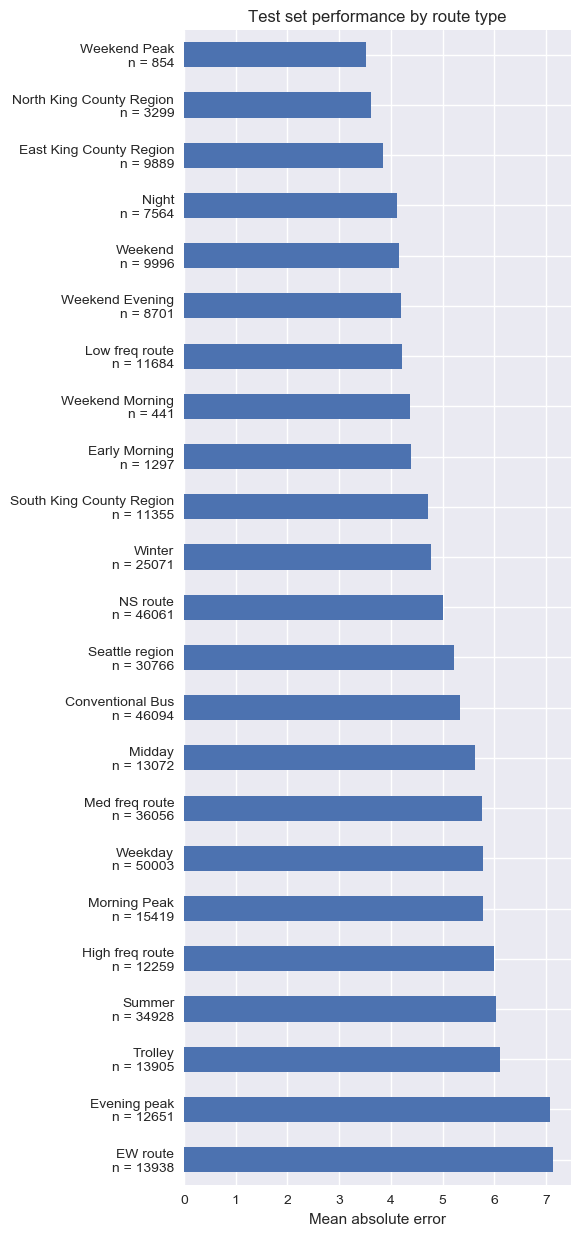

In [57]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')
d = pd.read_csv("../evaluation/15m_test_group_perf.csv")
d['lab'] = d['group'].apply(str) + '\nn = ' + d['n'].apply(str)
d = d.set_index(['lab'])
plt.figure(figsize=(5,15))
d['mae'].plot.barh()
plt.title("Test set performance by route type")
plt.xlabel("Mean absolute error")
plt.ylabel("")
plt.show()

In [58]:
weights.head()

Scaled: orca_total  Scaled: frac_disabled  Scaled: frac_youth  \
0           -0.125221              -0.010554            0.005203   
1           -0.250007              -0.003007           -0.019104   
2           -0.131505              -0.010030           -0.002575   
3           -4.437139              -0.900501            5.401143   
4           -0.647204              -0.144532           -0.037629   

   Scaled: frac_senior  Scaled: frac_li  Scaled: frac_uw  Scaled: hour  \
0            -0.008895        -0.008939         0.010085     -0.008744   
1            -0.013911        -0.022709         0.014970     -0.183286   
2            -0.016127        -0.016728        -0.015164      0.028946   
3             2.440420         6.458289         7.464507     -0.741136   
4             0.075518        -0.054567        -0.056201     -0.025814   

   is_ns: 0.0  is_ns: 1.0  is_weekend: 0.0  ...  \
0    0.101223    0.171257         0.188863  ...   
1    0.280177    0.139864         0.264689  ...   
2    0.074647    0.137767         0.152367  ...   
3   13.956024   23.442181        13.647957  ...   
4   -0.239603   -0.278355        -0.483157  ...   

   end: Tahlequah Ferry Terminal  end: Timberlane  end: Tukwila  \
0                       0.019620         0.007666      0.004840   
1                       0.002153         0.017122      0.016987   
2                       0.002914        -0.015706      0.007952   
3                       1.677842         1.543435    -19.320095   
4                       0.052328        -0.028924     -0.061895   

   end: Twin Lakes  end: University District  end: Unknown  \
0         0.014301                  0.056517     -0.002958   
1         0.046159                  0.117308     -0.011216   
2        -0.012184                  0.028345      0.015788   
3         4.584727                  1.981375      0.791807   
4         0.057246                 -0.128030      0.002276   

   end: Westwood Village  end: Woodinville  summer: False  summer: True  
0              -0.032579          0.006388       0.081420      0.176459  
1              -0.067062          0.018239       0.192399      0.240404  
2               0.001876          0.025692       0.110416      0.133302  
3             -10.213110         11.364361      19.231134     17.269108  
4               0.002306         -0.038243      -0.199003     -0.302740  

[5 rows x 414 columns]

In [71]:
from sklearn.decomposition import PCA
# What are the top factors?
pca2 = PCA(5)
results = pca2.fit_transform(weights)

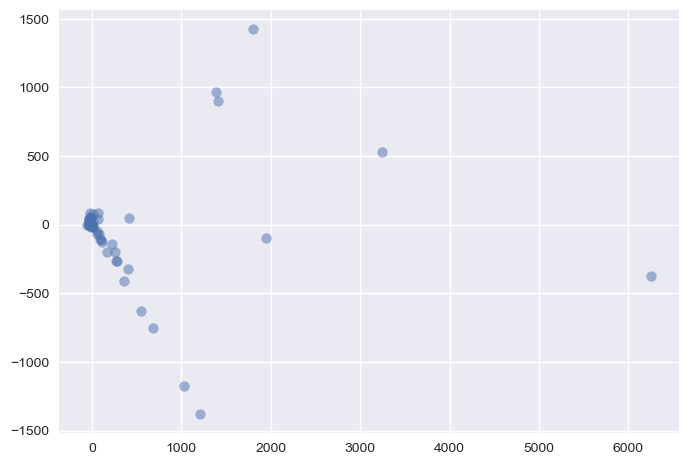

In [73]:
plt.scatter(results[:, 0], results[:, 1], alpha=0.5)
plt.show()

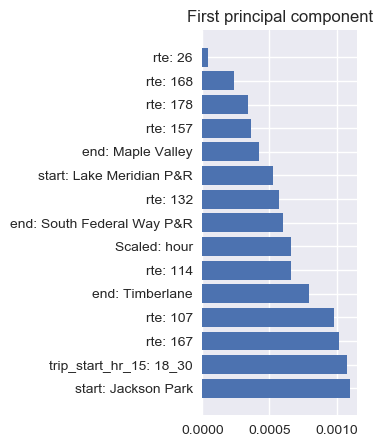

In [101]:
abs_vals = np.abs(pca2.components_[0])[np.argsort(np.abs(pca2.components_[0]))][:15][::-1]
names = np.array(column_labels)[np.argsort(np.abs(pca2.components_[0]))][:15][::-1]
plt.figure(figsize=(2,5))
plt.title("First principal component")
plt.barh(names, abs_vals)
plt.show()

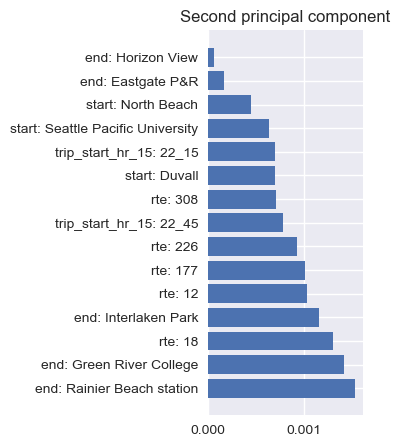

In [102]:
plt.figure(figsize=(2,5))
plt.title("Second principal component")
abs_vals = np.abs(pca2.components_[1])[np.argsort(np.abs(pca2.components_[1]))][:15][::-1]
names = np.array(column_labels)[np.argsort(np.abs(pca2.components_[1]))][:15][::-1]
plt.barh(names, abs_vals)
plt.show()

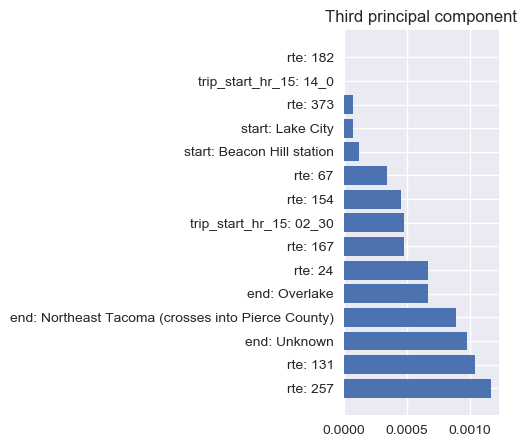

In [104]:
plt.figure(figsize=(2,5))
plt.title("Third principal component")
abs_vals = np.abs(pca2.components_[2])[np.argsort(np.abs(pca2.components_[2]))][:15][::-1]
names = np.array(column_labels)[np.argsort(np.abs(pca2.components_[2]))][:15][::-1]
plt.barh(names, abs_vals)
plt.show()

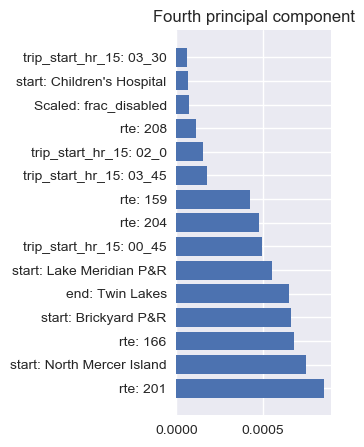

In [105]:
plt.figure(figsize=(2,5))
plt.title("Fourth principal component")
abs_vals = np.abs(pca2.components_[3])[np.argsort(np.abs(pca2.components_[3]))][:15][::-1]
names = np.array(column_labels)[np.argsort(np.abs(pca2.components_[3]))][:15][::-1]
plt.barh(names, abs_vals)
plt.show()

2
5
8
10
12
20


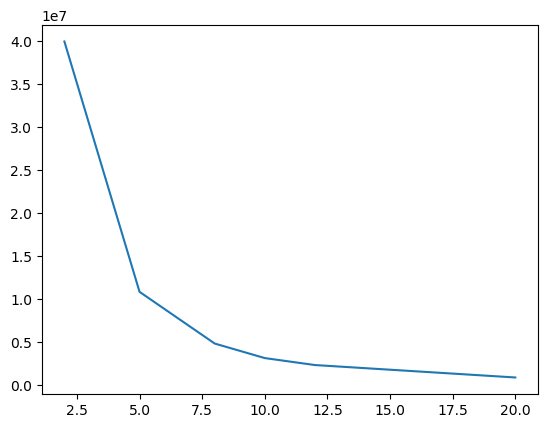

In [116]:
# clusters based on pca
from sklearn.cluster import KMeans
inertias = list()
for k in (2,5,8,10,12,20):
    print(k)
    km = KMeans(k)
    result = km.fit(weights)
    inertias.append(km.inertia_)

plt.plot((2,5,8,10,12,20), inertias)
plt.show()

In [121]:
# 10 clusters:
km = KMeans(10)
km.fit(weights)
km.__dict__

{'algorithm': 'auto',
 'cluster_centers_': array([[-6.8482685e-01,  6.5331459e-02,  4.7387898e-02, ...,
          7.3550813e-02,  8.1479859e-01,  3.5081768e-01],
        [ 1.6561323e+03,  1.7119766e+02,  8.5791801e+01, ...,
          4.9386997e+01,  4.1975845e+02,  4.0378171e+02],
        [ 2.3394316e+03,  2.4946342e+02,  1.8597134e+02, ...,
         -6.8502777e+01,  7.3111139e+02,  7.5541638e+02],
        ...,
        [-1.5752210e+01,  5.5988770e+00,  4.1751981e+00, ...,
         -4.9711258e+01,  3.1014059e+02,  1.5942130e+02],
        [ 4.2166214e+01,  1.4669643e+01,  1.0874757e+01, ...,
         -2.6035200e+01,  1.2547462e+02,  5.0338360e+01],
        [ 1.1198687e+01,  9.9013700e+00,  7.1628261e+00, ...,
         -5.9376569e+00,  5.7429886e+01,  5.7892193e+01]], dtype=float32),
 'copy_x': True,
 'inertia_': 3095861.1384281362,
 'init': 'k-means++',
 'labels_': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'max_iter': 300,
 'n_clusters': 10,
 'n_init': 10,
 'n_iter_': 3,
 'n_jobs': N

In [49]:

print(column_labels)
# Route number columns
is_route = np.array(['rte: ' in c for c in column_labels])

# Route start columns
is_rte_start = np.array(['start: ' in c for c in column_labels])

# Route end columns
is_rte_end = np.array(['end: ' in c for c in column_labels])

# Route region
is_region = np.array(['region: ' in c for c in column_labels])

# Day of week
is_day_of_wk = np.array(['day_of_week: ' in c for c in column_labels])

# Time of day columns
is_tod = np.array(['trip_start_' in c for c in column_labels])

cat_means = pd.DataFrame({
    'numerics': contributions[:, column_labels.apply(lambda x: x.startswith('Scaled'))].mean(axis=1),
    'ns': contributions[:, column_labels.apply(lambda x: x.startswith('is_ns'))].mean(axis=1),
    'weekend': contributions[:, column_labels.apply(lambda x: x.startswith('is_weekend')) ].mean(axis=1),
    'time_of_day': contributions[:, column_labels.apply(lambda x: x.startswith('trip_start_'))].mean(axis=1),
    'rte': contributions[:, column_labels.apply(lambda x: x.startswith('rte:'))].mean(axis=1),
    'card_dir': contributions[:, column_labels.apply(lambda x: x.startswith('dir:'))].mean(axis=1),
    'day_of_wk': contributions[:, column_labels.apply(lambda x: x.startswith('day_of_week:'))].mean(axis=1),
    'region': contributions[:, column_labels.apply(lambda x: x.startswith('region:'))].mean(axis=1),
    'start': contributions[:, column_labels.apply(lambda x: x.startswith('start:'))].mean(axis=1),
    'end': contributions[:, column_labels.apply(lambda x: x.startswith('end:'))].mean(axis=1),
    'summer': contributions[:, column_labels.apply(lambda x: x.startswith('summer:'))].mean(axis=1),
})

0                        Scaled: orca_total
1                     Scaled: frac_disabled
2                        Scaled: frac_youth
3                       Scaled: frac_senior
4                           Scaled: frac_li
5                           Scaled: frac_uw
6                              Scaled: hour
7                                is_ns: 0.0
8                                is_ns: 1.0
9                           is_weekend: 0.0
10                          is_weekend: 1.0
11                   trip_start_hr_15: 00_0
12                  trip_start_hr_15: 00_15
13                  trip_start_hr_15: 00_30
14                  trip_start_hr_15: 00_45
15                   trip_start_hr_15: 01_0
16                  trip_start_hr_15: 01_15
17                  trip_start_hr_15: 01_30
18                  trip_start_hr_15: 01_45
19                   trip_start_hr_15: 02_0
20                  trip_start_hr_15: 02_15
21                  trip_start_hr_15: 02_30
22                  trip_start_h

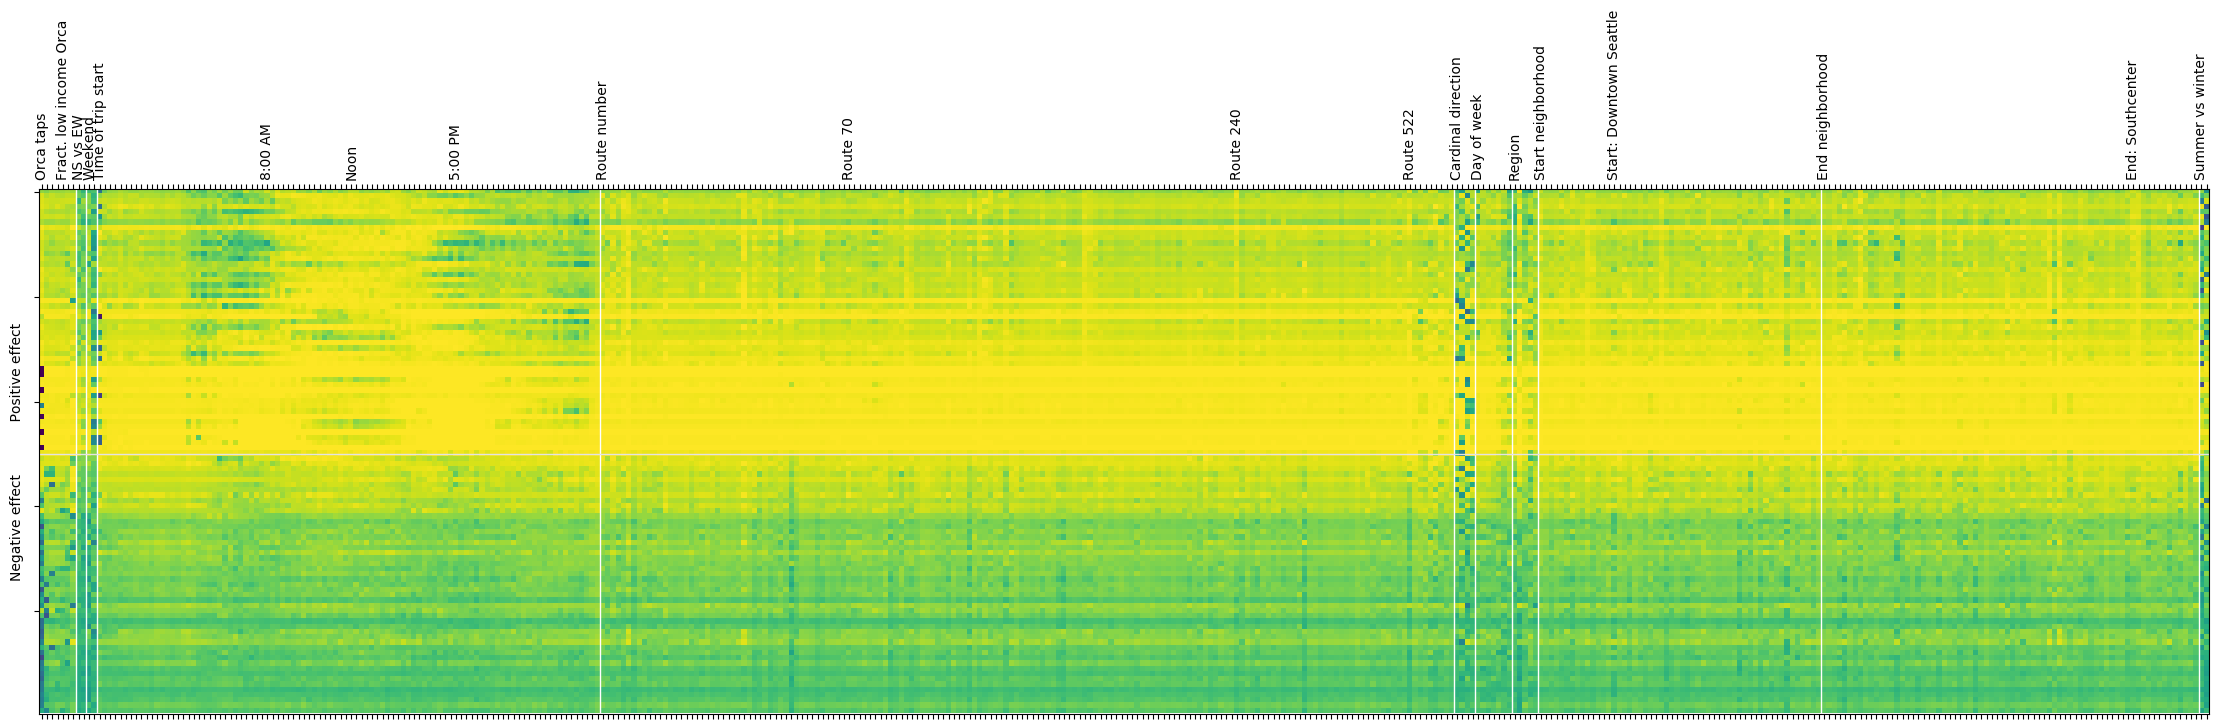

In [67]:
labs = [''] * contributions.shape[1]
column_labels = pd.Series(column_labels)
labs[np.where(column_labels.apply(lambda x: x.startswith('Scaled')))[0][0]] = 'Orca taps'
labs[np.where(column_labels.apply(lambda x: x.startswith('Scaled: frac_li')))[0][0]] = 'Fract. low income Orca'
labs[np.where(column_labels.apply(lambda x: x.startswith('is_ns')))[0][0]] = 'NS vs EW'
labs[np.where(column_labels.apply(lambda x: x.startswith('is_weekend')))[0][0]] = 'Weekend'
labs[np.where(column_labels.apply(lambda x: x.startswith('trip_start_')))[0][0]] = 'Time of trip start'
labs[np.where(column_labels.apply(lambda x: x.startswith('trip_start_hr_15: 08_0')))[0][0]] = '8:00 AM'
labs[np.where(column_labels.apply(lambda x: x.startswith('trip_start_hr_15: 12_0')))[0][0]] = 'Noon'
labs[np.where(column_labels.apply(lambda x: x.startswith('trip_start_hr_15: 17_0')))[0][0]] = '5:00 PM'
labs[np.where(column_labels.apply(lambda x: x.startswith('rte:')))[0][0]] = 'Route number'
labs[np.where(column_labels.apply(lambda x: x.startswith('rte: 70')))[0][0]] = 'Route 70'
labs[np.where(column_labels.apply(lambda x: x.startswith('rte: 240')))[0][0]] = 'Route 240'
labs[np.where(column_labels.apply(lambda x: x.startswith('rte: 522')))[0][0]] = 'Route 522'
labs[np.where(column_labels.apply(lambda x: x.startswith('dir:')))[0][0]] = 'Cardinal direction'
labs[np.where(column_labels.apply(lambda x: x.startswith('day_of_week:')))[0][0]] = 'Day of week'
labs[np.where(column_labels.apply(lambda x: x.startswith('region:')))[0][0]] = 'Region'
labs[np.where(column_labels.apply(lambda x: x.startswith('start:')))[0][0]] = 'Start neighborhood'
labs[np.where(column_labels.apply(lambda x: x.startswith('start: Downtown Seattle')))[0][0]] = 'Start: Downtown Seattle'
labs[np.where(column_labels.apply(lambda x: x.startswith('end:')))[0][0]] = 'End neighborhood'
labs[np.where(column_labels.apply(lambda x: x.startswith('end: Southcenter')))[0][0]] = 'End: Southcenter'
labs[np.where(column_labels.apply(lambda x: x.startswith('summer:')))[0][0]] = 'Summer vs winter'

lines = list()
lines.append(np.where(column_labels.apply(lambda x: x.startswith('is_ns')))[0][0])
lines.append(np.where(column_labels.apply(lambda x: x.startswith('is_weekend')))[0][0])
lines.append(np.where(column_labels.apply(lambda x: x.startswith('trip_start_')))[0][0])
lines.append(np.where(column_labels.apply(lambda x: x.startswith('rte:')))[0][0])
lines.append(np.where(column_labels.apply(lambda x: x.startswith('dir:')))[0][0])
lines.append(np.where(column_labels.apply(lambda x: x.startswith('day_of_week:')))[0][0])
lines.append(np.where(column_labels.apply(lambda x: x.startswith('region:')))[0][0])
lines.append(np.where(column_labels.apply(lambda x: x.startswith('start:')))[0][0])
lines.append(np.where(column_labels.apply(lambda x: x.startswith('end:')))[0][0])
lines.append(np.where(column_labels.apply(lambda x: x.startswith('summer:')))[0][0])

plt.style.use('default')
fig = plt.figure(figsize=(28, 15))
ax = fig.gca()
ax.matshow(contributions)
ax.set_xticks(np.arange(len(labs)))
ax.set_xticklabels(labs)
ax.set_yticklabels([''] * contributions.shape[0])
plt.setp(ax.get_xticklabels(), rotation=90, ha='left', va="center", rotation_mode="anchor")
for x in lines:
    plt.axvline(x=x-0.5, color='white', linewidth=1)
plt.axhline(y=50, color='#e3e3e3', linewidth=1)
plt.ylabel("Negative effect            Positive effect")
plt.show()

In [55]:
# Feature importance?
cat_means.sum(axis=0).sort_values()

summer         73.386978
weekend        73.932114
ns             75.957397
card_dir       79.437340
region         82.857491
numerics       83.690155
day_of_wk      85.049637
time_of_day    87.202461
start          87.789879
end            87.820572
rte            88.028351
dtype: float32

In [57]:
#cat_means.plot.scatter()
pd.plotting.scatter_matrix(cat_means, figsize=(15,15))
plt.show()

In [163]:
# Try the same with uncorrected weights


cat_means = pd.DataFrame({
    'route_num': weight_matrices[0][is_route].mean(axis=0),
    'rte_start': weight_matrices[0][is_rte_start].mean(axis=0),
    'rte_end': weight_matrices[0][is_rte_end].mean(axis=0),
    'region': weight_matrices[0][is_region].mean(axis=0),
    'day_of_wk': weight_matrices[0][is_day_of_wk].mean(axis=0),
    'time_of_day': weight_matrices[0][is_day_of_wk].mean(axis=0),
})

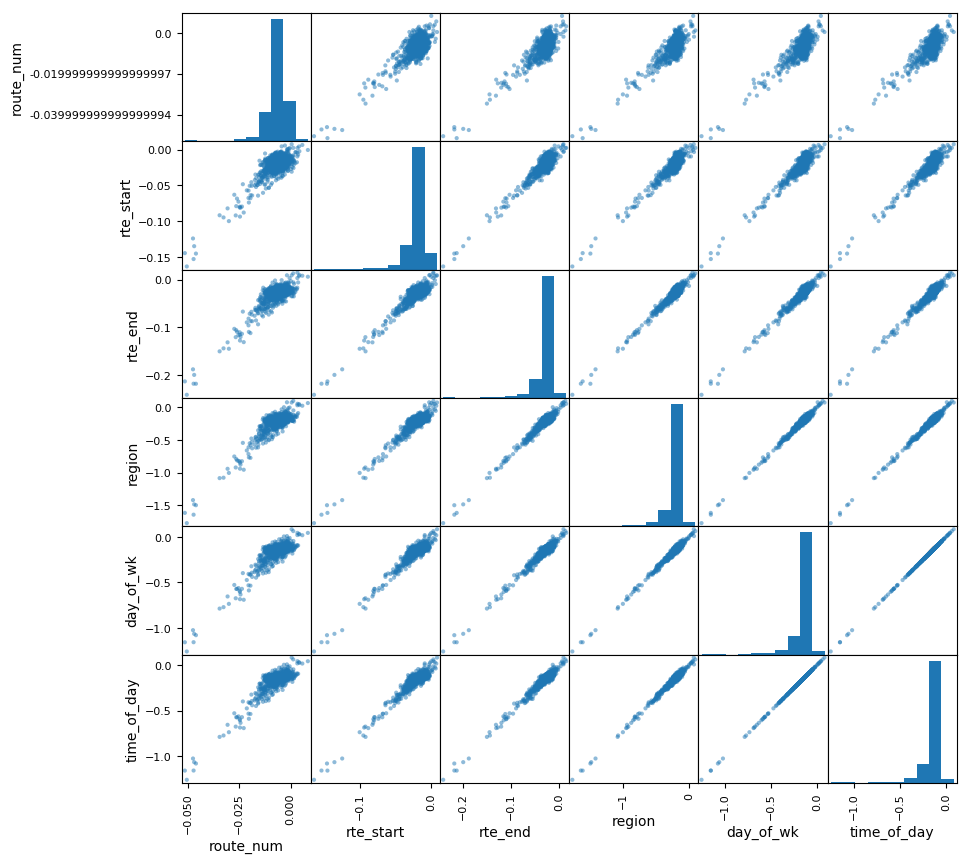

In [164]:
#cat_means.plot.scatter()
pd.plotting.scatter_matrix(cat_means, figsize=(10,10))
plt.show()

In [165]:
cat_means.corr()

route_num  rte_start   rte_end    region  day_of_wk  time_of_day
route_num     1.000000   0.807217  0.839075  0.855764   0.852740     0.852740
rte_start     0.807217   1.000000  0.927403  0.937913   0.935654     0.935654
rte_end       0.839075   0.927403  1.000000  0.974246   0.972980     0.972980
region        0.855764   0.937913  0.974246  1.000000   0.988437     0.988437
day_of_wk     0.852740   0.935654  0.972980  0.988437   1.000000     1.000000
time_of_day   0.852740   0.935654  0.972980  0.988437   1.000000     1.000000